<a href="https://colab.research.google.com/github/repoocsov/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [12]:
# GOING OVER CHI SQUARED TESTS TOMORROW MORE. WILL REVISIT THIS. SUBMITTING FOR NOW ANYWAY.
# Importing dataframe
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, na_values='?')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [13]:
# Fixing headers, converting strings into a numeric format, and seperating democrats and republicans into two seperate dataframes
import numpy as np

# Designating headers
headers = ['party', 'handicapped-infants', 'water-project', 
'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 
'south-africa']
df.columns = headers

# Converting to numeric format
df = df.replace({'n': 0, 'y': 1})
df.head()

# Creating two seperate dataframes
condition = df['party'] == 'republican'
republicans = df[condition]
republicans.head(20)

condition = df['party'] == 'democrat'
democrats = df[condition]
democrats.head(20)

# 267 dems
# 168 repubs

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
12,democrat,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
13,democrat,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.0,1.0,NaN
16,democrat,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0,NaN,0.0,0.0,1.0
17,democrat,1.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


##**Creating a confidence interval**

*The following was incorrectly creating a confidence interval. Instead I simulated more samples. keeping for posterity.

In [0]:
import scipy.stats as stats

# Define a function to take in a dataset and return the confidence interval based on a 95% confidence level
def confidence_interval(data, confidence=0.95):

  # Convert the data into a numpy array and save to the data variable
  data = np.array(data)

  # calculate the mean of this array and save it to mean
  mean = np.mean(data)

  # Saves the length (number of instances) of the data to the variable n
  n = len(data)

  # Calculates the standard devation of our data where the ddof is n-1. Saves this to the variable s
  s = np.std(data, ddof=1)

  # Calculates the standard error and saves this to stderr (Measure of spread)
  stderr = s / np.sqrt(n)

  # Calculates the distance from the mean (upper and lower bounds) our margins of error will be
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)

  # returns the mean, upper, and lower bounds for the margin of error
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [21]:
"""Example confidence interval for the republicans budget bill voting data"""

# First need to create a new dataframe without nans
rep_budget_no_nans = republicans['budget'].dropna(axis=0)

# Pass in our dataframe and the confidence level
rep_budget_ci = confidence_interval(rep_budget_no_nans, confidence=0.95)
rep_budget_ci

(0.13414634146341464, 0.08143520131697565, 0.18685748160985363)

# **Confidence interval for republican['budget'] given 95%**



With the central limit theorem we know that given another sample, 95% of the time the mean vote of this sample will fall between .081435 (lower bound, 2.5%) and .186857 (upper bound, 97.5%).

In [53]:
# Simulate more sample datasets

# Where n is the range of outcomes, p is expected mean, and size is rep_budget_no_nans length
rep_budget_simulation = np.random.binomial(n=1, p=.13414634146341464, size=164)

confidence_interval(rep_budget_simulation)

(0.13414634146341464, 0.08143520131697565, 0.18685748160985363)

In [54]:
# Simulating more sample republican house voting data on the budget bill and saving these means to an array

# As the number of samples increases the more normal the distribution becomes and the narrower (confidence increases) our confidence interval becomes
rep_budget_means = []
for x in range(0,500):
  rep_budget_simulation = np.random.binomial(n=1, p=.13414634146341464, size=164)
  rep_budget_means.append(rep_budget_simulation.mean())

print(rep_budget_means)

[0.12804878048780488, 0.12195121951219512, 0.12195121951219512, 0.10975609756097561, 0.13414634146341464, 0.14634146341463414, 0.1524390243902439, 0.12195121951219512, 0.12804878048780488, 0.12804878048780488, 0.0975609756097561, 0.11585365853658537, 0.13414634146341464, 0.12195121951219512, 0.0975609756097561, 0.1524390243902439, 0.17073170731707318, 0.16463414634146342, 0.12195121951219512, 0.12195121951219512, 0.20121951219512196, 0.10975609756097561, 0.10975609756097561, 0.10365853658536585, 0.14634146341463414, 0.12195121951219512, 0.12804878048780488, 0.09146341463414634, 0.12195121951219512, 0.14634146341463414, 0.18902439024390244, 0.1524390243902439, 0.11585365853658537, 0.12804878048780488, 0.12195121951219512, 0.10975609756097561, 0.16463414634146342, 0.11585365853658537, 0.10365853658536585, 0.12195121951219512, 0.12195121951219512, 0.1402439024390244, 0.10365853658536585, 0.1524390243902439, 0.17073170731707318, 0.12804878048780488, 0.17073170731707318, 0.15853658536585366

(0.1336951219512195, 0.1314449237948323, 0.13594532010760668)


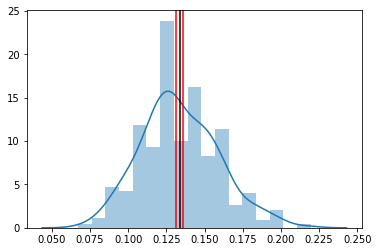

In [56]:
# Graphic representation of our confidence interval
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(rep_budget_means)
CI = confidence_interval(rep_budget_means)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');
print(CI)

# This is not the correct confidence interval, instead this shows the distribution of 500 more simulated instances of republicans voting on the budget bill
# See below for the confidence interval on the only sample we have (no additional simulations)

#**The Correct confidence interval**

In [83]:
rep_budget_ci

(0.13414634146341464, 0.08143520131697565, 0.18685748160985363)

(0.13414634146341464, 0.08143520131697565, 0.18685748160985363)


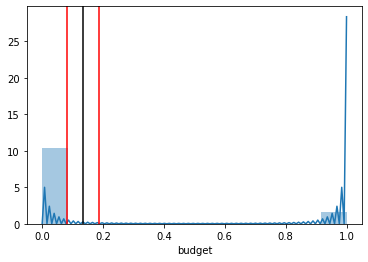

In [85]:
sns.distplot(rep_budget_no_nans)
CI = confidence_interval(rep_budget_no_nans)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');
print(CI)

##**Conclusions:**
With 95% confidence, the population parameter lies between 0.08143520131697565, 0.18685748160985363.



#**Part 2: Chi-squared tests**

In [106]:
# let's reload and clean our dataset, but this time ignoring ?'s as they can be considered catagorical data

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)
df.head()

# Designating headers
headers = ['party', 'handicapped-infants', 'water-project', 
'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 
'south-africa']
df.columns = headers

# Converting to numeric format
df = df.replace({'n': 0, 'y': 2, '?': 1})
df.head()

# Creating two seperate dataframes
condition = df['party'] == 'republican'
republicans = df[condition]
republicans.head(2)

condition = df['party'] == 'democrat'
democrats = df[condition]
democrats.head(2)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,1,2,2,1,2,2,0,0,0,0,2,0,2,2,0,0
3,democrat,0,2,2,0,1,2,0,0,0,0,2,0,2,0,0,2


In [112]:
# drop the party column
#democrats = democrats.drop('party', axis=1)
#republicans = republicans.drop('party', axis=1)

# First convert dataframes into numpy arrays
republican_np_array = republicans.values
republican_np_array = np.array(republican_np_array)
republican_np_array

democrat_np_array = democrats.values
democrat_np_array = np.array(democrat_np_array)
democrat_np_array

array([[1, 2, 2, ..., 2, 0, 0],
       [0, 2, 2, ..., 0, 0, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 0, 2, 2],
       [2, 0, 2, ..., 1, 2, 2],
       [0, 0, 2, ..., 0, 0, 2]])

In [114]:
print('REPUBLICAN')
contingency_table = republican_np_array

chi_2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
chi_2_stat, p_value, dof, expected

REPUBLICAN


(2129.4649913040503,
 0.9999999884528987,
 2505,
 array([[0.44217687, 1.15646259, 0.32653061, ..., 2.19727891, 0.27210884,
         1.45578231],
        [0.349087  , 0.91299678, 0.25778733, ..., 1.73469388, 0.21482277,
         1.14930183],
        [0.349087  , 0.91299678, 0.25778733, ..., 1.73469388, 0.21482277,
         1.14930183],
        ...,
        [0.39563194, 1.03472968, 0.29215897, ..., 1.96598639, 0.24346581,
         1.30254207],
        [0.4189044 , 1.09559613, 0.30934479, ..., 2.08163265, 0.25778733,
         1.37916219],
        [0.39563194, 1.03472968, 0.29215897, ..., 1.96598639, 0.24346581,
         1.30254207]]))

In [115]:
print('DEMOCRAT')
contingency_table = democrat_np_array

chi_2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
chi_2_stat, p_value, dof, expected

DEMOCRAT


(3646.1051377210856,
 0.9999623167928648,
 3990,
 array([[1.15649628, 0.9655483 , 1.68970952, ..., 0.68453051, 1.21053817,
         1.54199505],
        [0.93965323, 0.78450799, 1.37288899, ..., 0.55618104, 0.98356226,
         1.25287098],
        [1.51790137, 1.26728214, 2.21774375, ..., 0.8984463 , 1.58883134,
         2.0238685 ],
        ...,
        [1.2287773 , 1.02589507, 1.79531637, ..., 0.72731367, 1.2861968 ,
         1.63836974],
        [1.44562036, 1.20693537, 2.11213691, ..., 0.85566314, 1.51317271,
         1.92749381],
        [0.86737221, 0.72416122, 1.26728214, ..., 0.51339788, 0.90790363,
         1.15649628]]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)